In [2]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import pkg_resources
import aesara.tensor as at
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import math
from util import *
from models import *
from plots import *

In [3]:
df = load_garcia2022()
df['n2-n1'] = df['n2'] - df['n1']

# Some initial visualizations

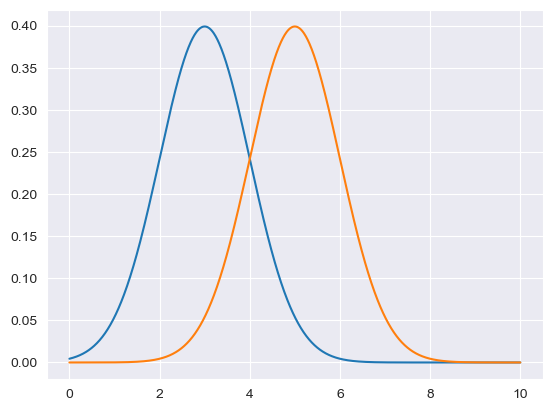

In [3]:
mu_1, sd_1, mu_2, sd_2 = 3.0, 1.0, 5.0, 1.0
x = np.linspace(0, 10, 1000)

dist1 = ss.norm(mu_1, sd_1)
dist2 = ss.norm(mu_2, sd_2)

plt.plot(x, dist1.pdf(x))
plt.plot(x, dist2.pdf(x))

Here we now get the difference of the distributions and plot it

(2.0, 1.4142135623730951)

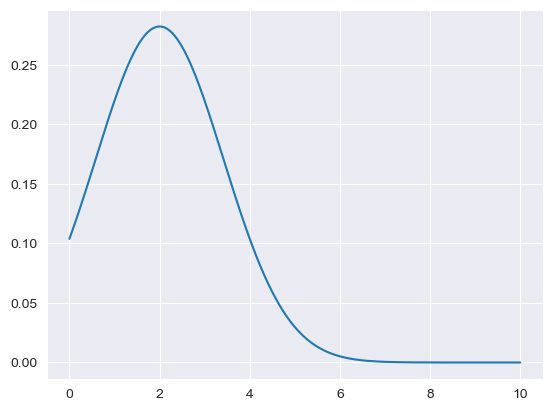

In [4]:
mu_diff, sd_diff = get_diff_dist(mu_1, sd_1, mu_2, sd_2)

dist3 = ss.norm(mu_diff, sd_diff)
plt.plot(x, dist3.pdf(x))

mu_diff, sd_diff

Here we plot the pdf (probability density function)


0.07864960352514258

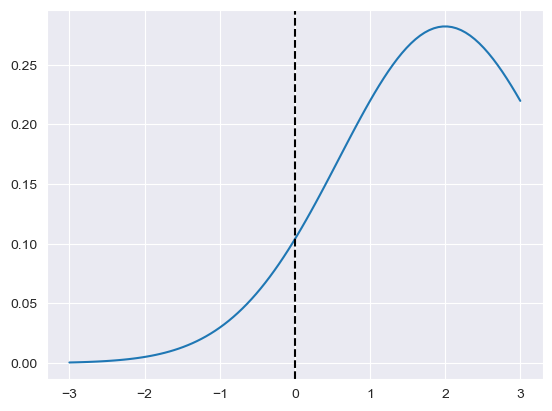

In [5]:
x = np.linspace(-3, 3, 100)
plt.plot(x, ss.norm(mu_diff, sd_diff).pdf(x))
plt.axvline(0.0, c='k', ls='--')

# print p val
ss.norm(mu_diff, sd_diff).cdf(0.0)

here we plot the difference in the cdf dependent on the standard deviation

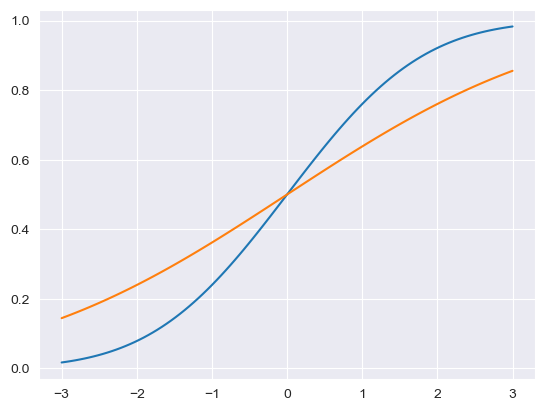

In [6]:
# print variing cdf values
plt.plot(x, ss.norm(-x, sd_diff).cdf(0))
plt.plot(x, ss.norm(-x, sd_diff*2).cdf(0))

[-3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.
  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3.
 -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.
  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2.
 -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.
  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.
  0.  1.  2.  3.]
[-0.52696328 -2.78854084  2.49217639 -4.8431913  -3.97621995  1.50958522
  5.61161301 -5.62339908 -1.82430709  2.93104329  1.86127933  1.26823583
  0.76965474  2.81299381 -3.50806947 -3.50959877 -3.08097583  4.28958796
 -2.48414727  5.83199967  5.26162787 -4.28985784 -1.07460278 -1.32519556
 -1.04606853  2.70919494  1.48065789  7.60761448 -0.60954966 -6.90644892
 -3.81732743  0.96593851  2.67065728  1.94690961  6.99655866 -4.14612312
 -5.81441284 -3.50599278  0.32558081  0.61763228 -0.09888811  0.80683761
 -6.02989008 -2.65279804 -6.00223

<Axes: xlabel='diff', ylabel='choice'>

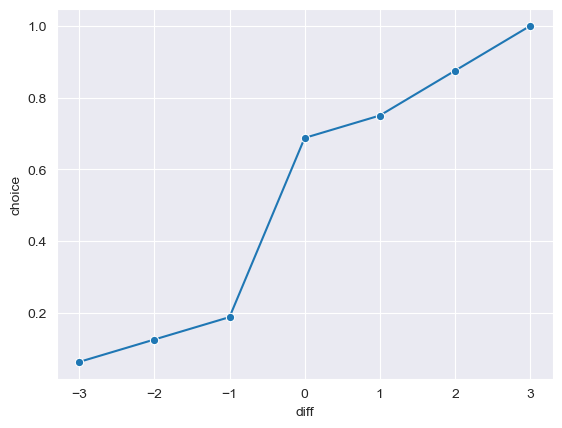

In [7]:
sigma = 2.5

x = np.array([-3, -2, -1, 0.0, 1, 2, 3] * 16) # example numbers
print(x)
choices = ss.norm(x, sigma).rvs()
print(choices)
choices = choices > 0.0

simulated_data = pd.DataFrame({'diff':x, 'choice':choices})

tmp = simulated_data.groupby('diff').mean()
sns.lineplot(tmp.reset_index(), x='diff', y='choice', marker='o')

# cost = make_cost_function(x, choices)
# result = minimize(cost, [1.0], bounds=[(1e-6, np.inf)], method='L-BFGS-B')
# result.x
# fit_simple_probit(x, choices, [5.0])

# First looks at the data

/var/folders/ds/hcvqyw7n4071bn4f5tj9dtkw0000gn/T/ipykernel_99069/1285367102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['q(x)'] = pd.qcut(tmp['log(n2/n1)'], 6).apply(lambda x: x.mid)


<Axes: xlabel='q(x)', ylabel='choice'>

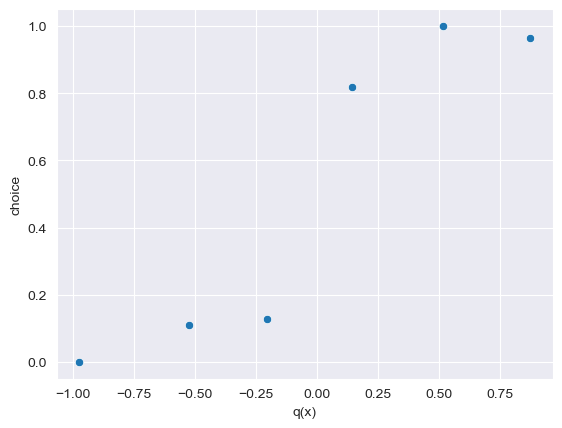

In [8]:
tmp = df.loc[1]

# qcut -> quantile based discredization -> we take the mid of the quantiles
tmp['q(x)'] = pd.qcut(tmp['log(n2/n1)'], 6).apply(lambda x: x.mid)

tmp = tmp.groupby(['q(x)']).mean()[['choice']]

sns.scatterplot(tmp.reset_index(), x='q(x)', y='choice')
# sns.scatterpl(tmp.reset_index(), 'log(n1/n2)', 'choice')

/var/folders/ds/hcvqyw7n4071bn4f5tj9dtkw0000gn/T/ipykernel_99069/2617602095.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abs(df['n2'] - df['n1']))


<Axes: ylabel='Density'>

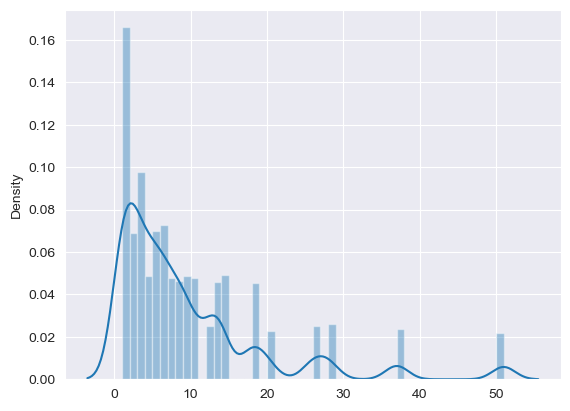

In [9]:
sns.distplot(abs(df['n2'] - df['n1']))

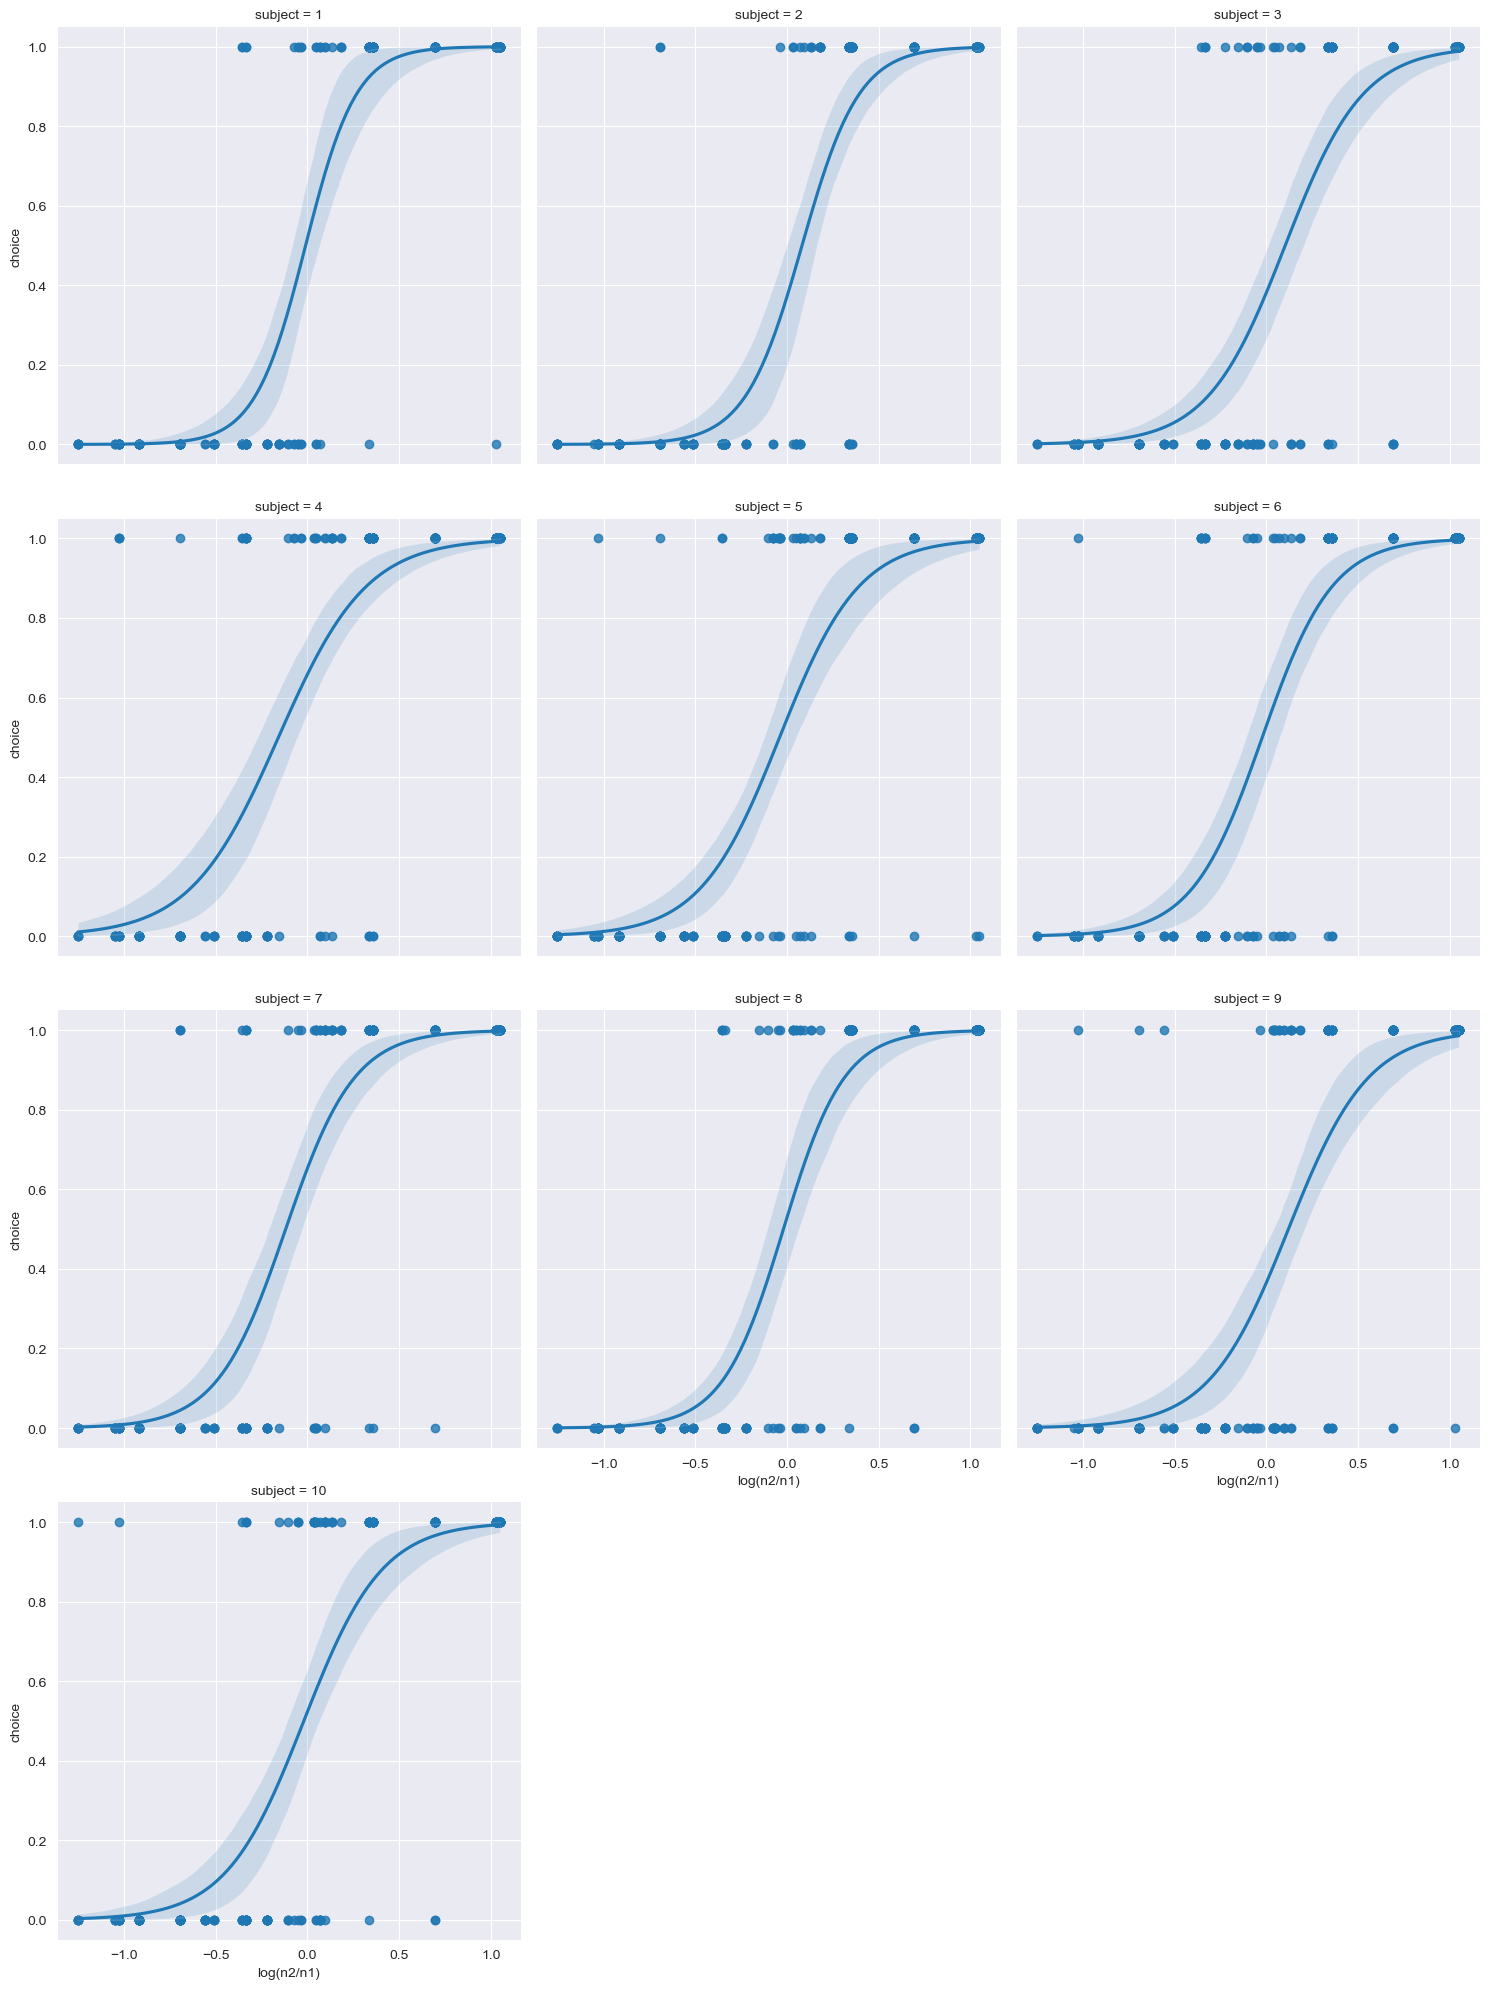

In [10]:
sns.lmplot(df.loc[:10].reset_index(), x='log(n2/n1)', y='choice', logistic=True, col='subject', col_wrap=3)

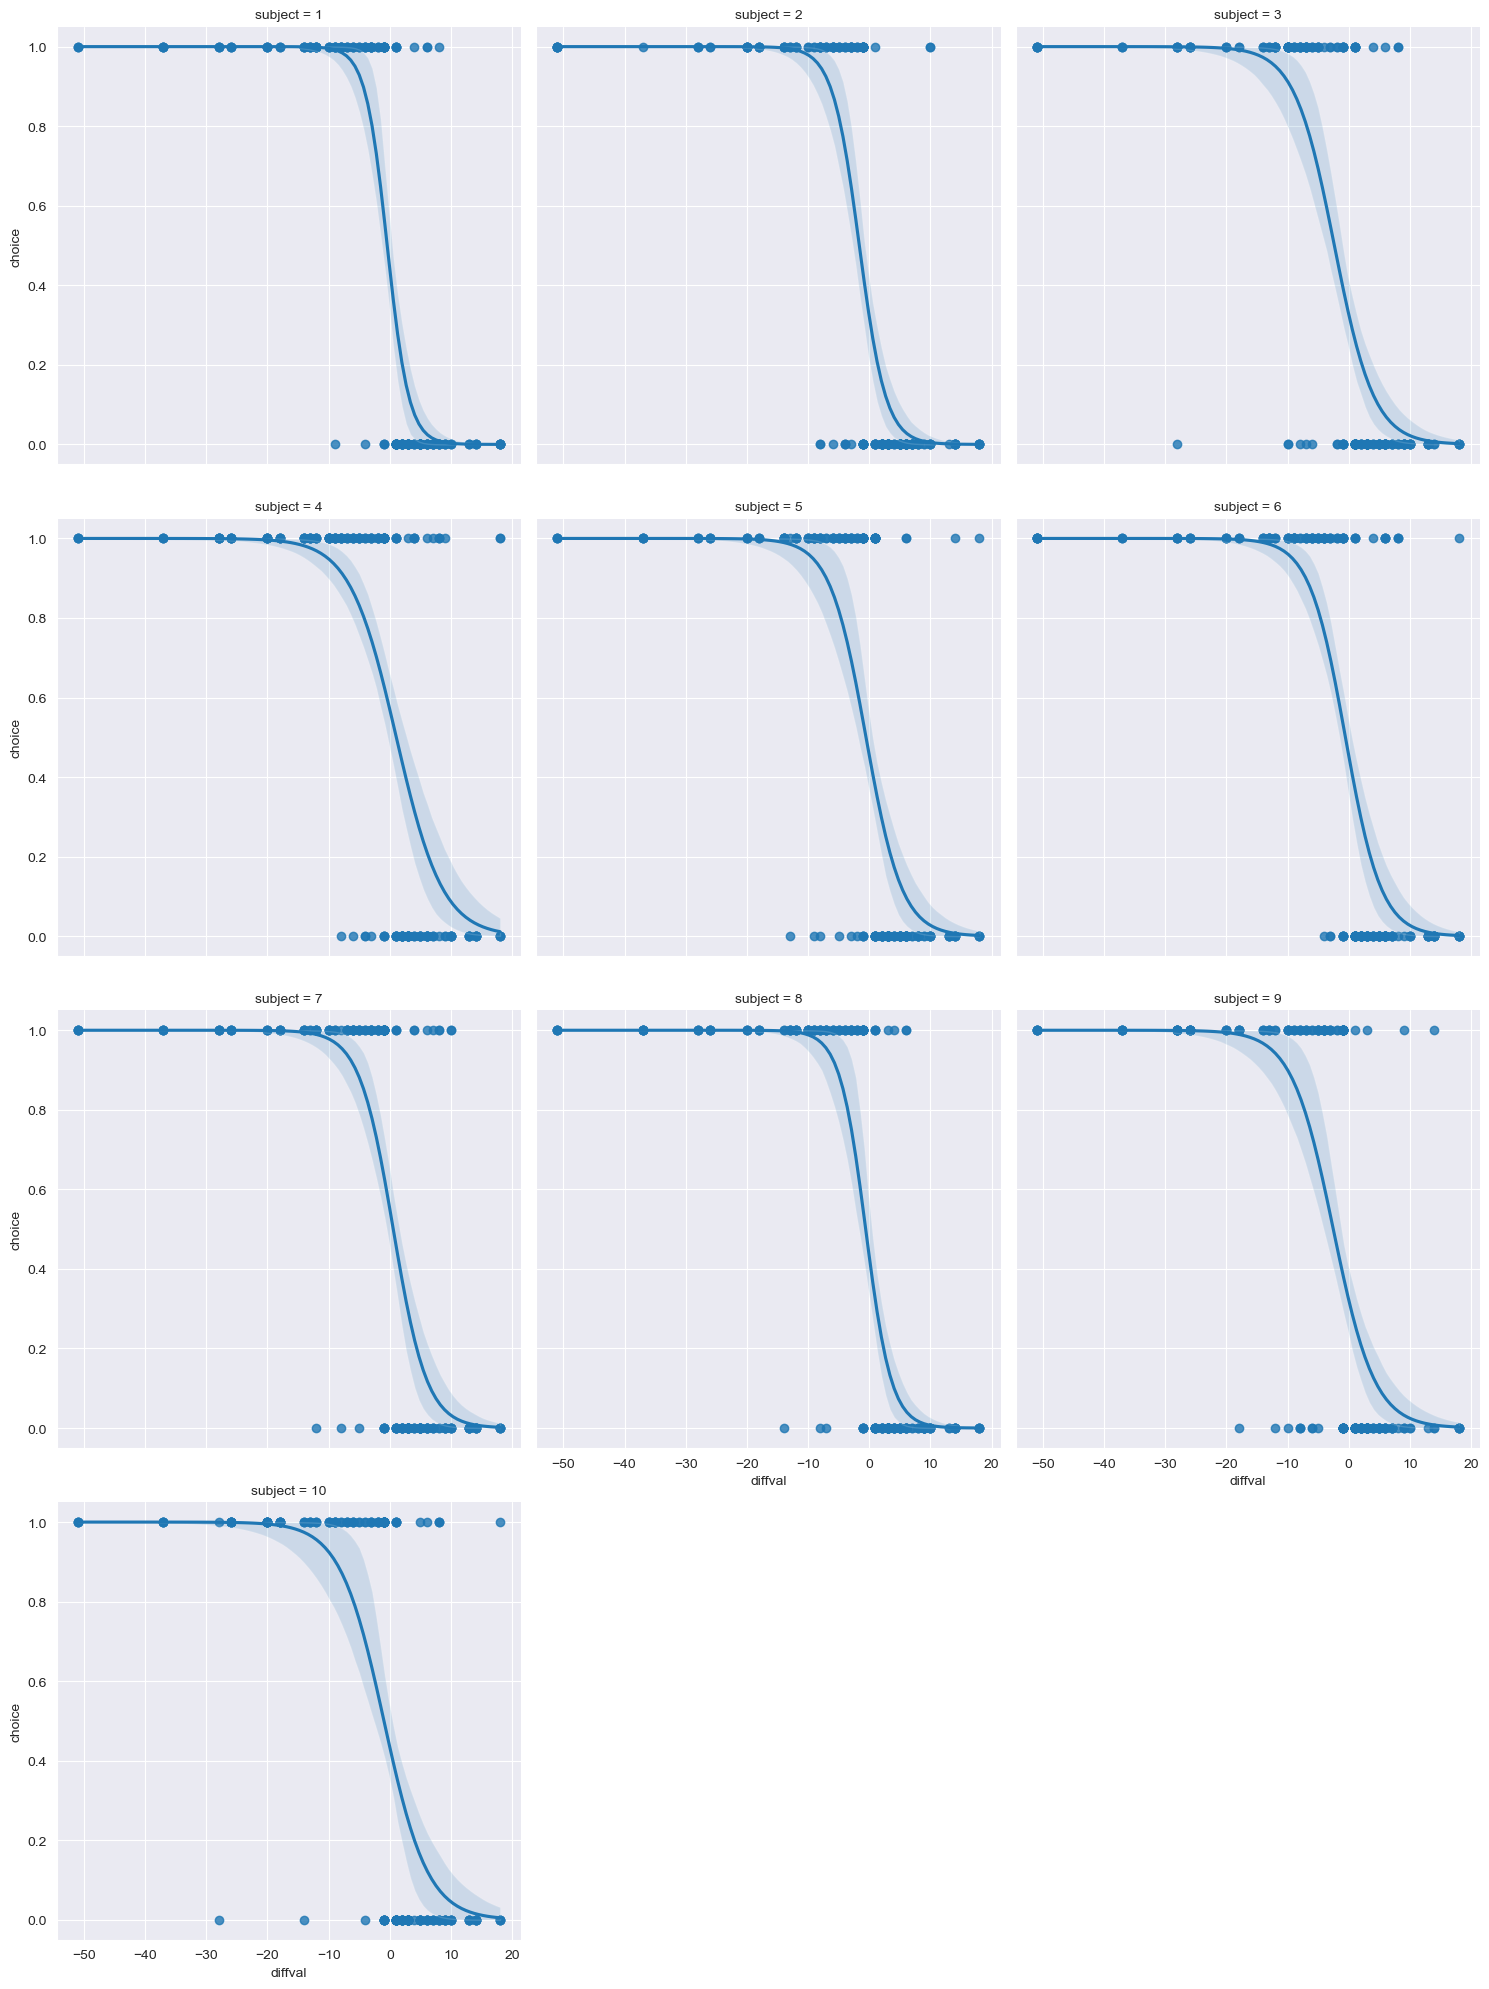

In [11]:
sns.lmplot(df.loc[:10].reset_index(), x='diffval', y='choice', logistic=True, col='subject', col_wrap=3)

In [12]:
df['choice'] = ~df['choice'].astype(bool)

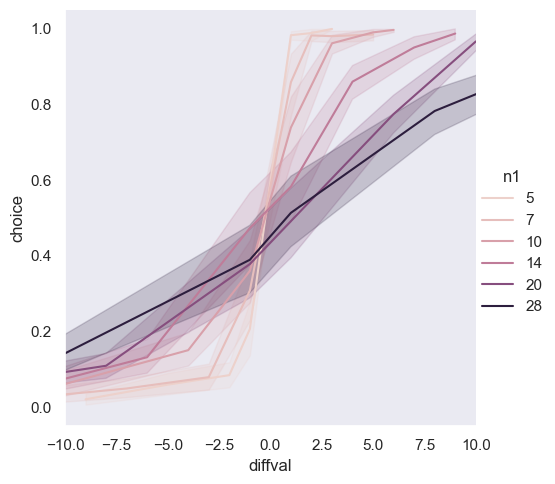

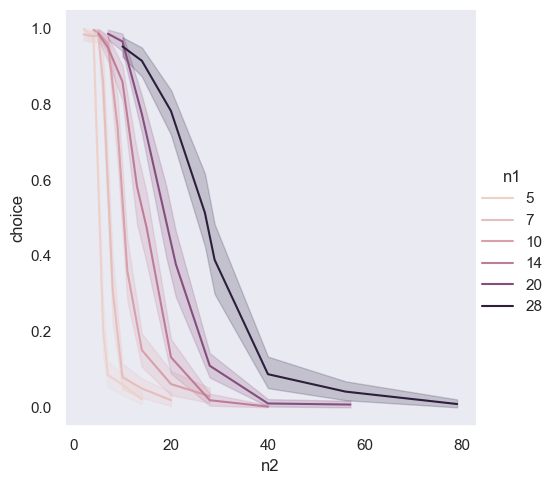

In [24]:
sns.set(style='dark')
sns.relplot(df.groupby(['subject', 'n1', 'diffval']).mean().reset_index(), x='diffval', y='choice', hue='n1', kind='line')
plt.xlim(-10, 10)

sns.set(style='dark')
sns.relplot(df.groupby(['subject', 'n1', 'diffval']).mean().reset_index(), x='n2', y='choice', hue='n1', kind='line')

(0.0, 60.0)

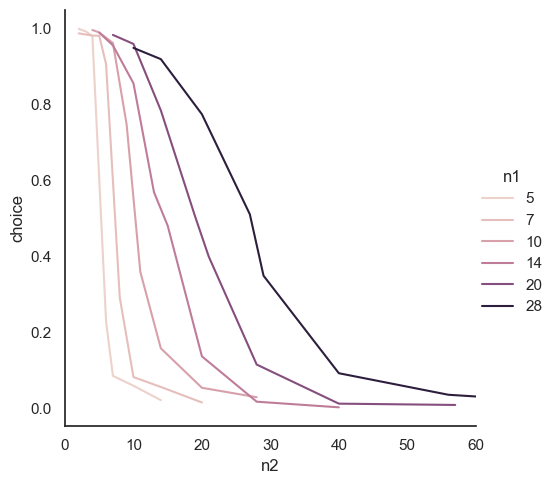

In [14]:
sns.set(style='white')
sns.relplot(df.groupby(['n1', 'n2']).mean().reset_index(), x='n2', y='choice', hue='n1', kind='line')
plt.xlim(0, 60)

In [4]:
relplot1 = sns.relplot(df.groupby(['subject', 'n1', 'n2-n1']).mean().reset_index(), x='n2', y='choice', hue='n1', kind='line')
plt.savefig('choice_over_n2.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 565.5x500 with 0 Axes>

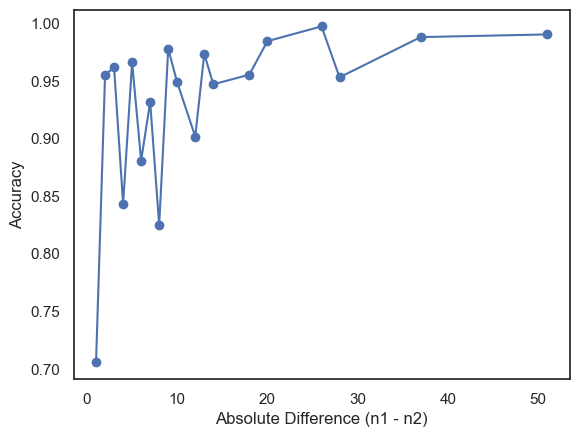

In [15]:
def plot_accuracy_vs_diff(data):
    data['abs_diff'] = np.abs(data['n1'] - data['n2'])
    grouped_data = data.groupby('abs_diff')['accuracy'].mean().reset_index()

    plt.plot(grouped_data['abs_diff'], grouped_data['accuracy'], 'o-')
    plt.xlabel('Absolute Difference (n1 - n2)')
    plt.ylabel('Accuracy')
    plt.show()

plot_accuracy_vs_diff(df)

## Response time distribution
distribution of response times for the correct and incorrect choices to see the participants' speed-accuracy trade-off

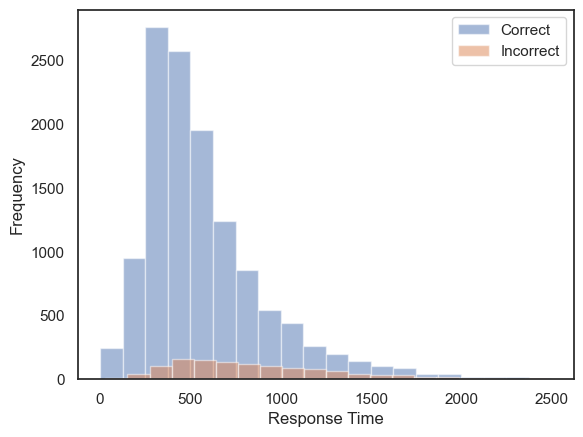

In [16]:
def plot_rt_distribution(data):
    correct_rt = data[data['accuracy'] == 1]['rt']
    incorrect_rt = data[data['accuracy'] == 0]['rt']

    plt.hist(correct_rt, alpha=0.5, label='Correct', bins=20)
    plt.hist(incorrect_rt, alpha=0.5, label='Incorrect', bins=20)
    plt.xlabel('Response Time')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_rt_distribution(df)

## Bias in choice
the proportion of choices biased towards either n1 or n2 as a function of the difference between the two stimuli

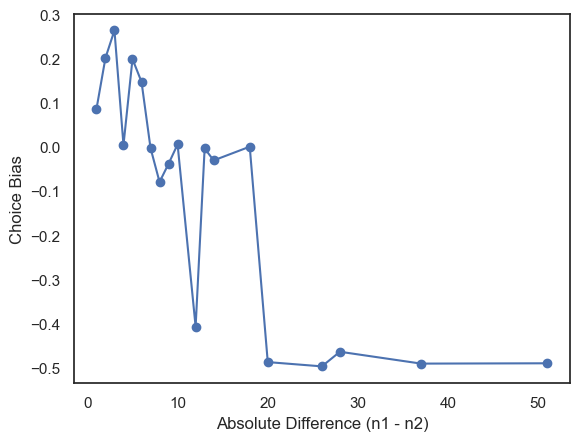

In [17]:
def plot_choice_bias(data):
    data['choice_diff'] = data['choice'] - 0.5
    grouped_data = data.groupby('abs_diff')['choice_diff'].mean().reset_index()

    plt.plot(grouped_data['abs_diff'], grouped_data['choice_diff'], 'o-')
    plt.xlabel('Absolute Difference (n1 - n2)')
    plt.ylabel('Choice Bias')
    plt.show()

plot_choice_bias(df)

In [7]:
df.head(300)

cueonset1  cueoffset1  cueonset2  cueoffset2  \
subject run trial_nr                                                 
1       1   1             35070       36600      36600       37630   
            2             50095       51614      51614       52628   
            3             65565       67087      67087       68095   
            4             79005       80523      80523       81527   
            5             92946       94467      94467       95473   
...                         ...         ...        ...         ...   
2       3   80           143630      145152     145152      146155   
            81           157588      159113     159113      160114   
            82           172029      173547     173547      174554   
            83           184974      186493     186493      187497   
            84           198440      199963     199963      200968   

                      stimonset1  stimoffset1  isistimonset  isistimoffset  \
subject run trial_nr                                                         
1       1   1              37630        38243         38276          46276   
            2              52628        53248         53280          61780   
            3              68095        68719         68752          75252   
            4              81527        82147         82180          89180   
            5              95473        96096         96129         105129   
...                          ...          ...           ...            ...   
2       3   80            146155       146771        146804         153804   
            81            160114       160720        160753         168253   
            82            174554       175161        175195         181195   
            83            187497       188102        188134         194634   
            84            200968       201597        201629         210629   

                      stimonset2  stimoffset2  ...  rad  correct  leftright  \
subject run trial_nr                           ...                            
1       1   1              46276        46903  ...  190       -1         -1   
            2              61780        62380  ...  170       -1          1   
            3              75252        75852  ...  210       -1         -1   
            4              89180        89810  ...  210       -1         -1   
            5             105129       105754  ...  150       -1         -1   
...                          ...          ...  ...  ...      ...        ...   
2       3   80            153804       154425  ...  210       -1         -1   
            81            168253       168886  ...  190        1          1   
            82            181195       181795  ...  160        1          1   
            83            194634       195236  ...  170       -1         -1   
            84            210629       211258  ...  200       -1         -1   

                      pressedkey  n1  n2  choice  log(n1/n2)  log(n2/n1)  \
subject run trial_nr                                                       
1       1   1                 49   7  10    True   -0.356675    0.356675   
            2                 51   5  14   False   -1.029619    1.029619   
            3                 49   7  14    True   -0.693147    0.693147   
            4                 49   7  10    True   -0.356675    0.356675   
            5                 49   5  10    True   -0.693147    0.693147   
...                          ...  ..  ..     ...         ...         ...   
2       3   80                49   5   7    True   -0.336472    0.336472   
            81                51  28  10   False    1.029619   -1.029619   
            82                51  14  10   False    0.336472   -0.336472   
            83                49  14  40    True   -1.049822    1.049822   
            84                49   7  10    True   -0.356675    0.356675   

                      n2-n1  
subject run trial_nr         
1       1   1      

In [19]:
df

cueonset1  cueoffset1  cueonset2  cueoffset2  \
subject run trial_nr                                                 
1       1   1             35070       36600      36600       37630   
            2             50095       51614      51614       52628   
            3             65565       67087      67087       68095   
            4             79005       80523      80523       81527   
            5             92946       94467      94467       95473   
...                         ...         ...        ...         ...   
64      6   212          479612      481136     481136      482144   
            213          492572      494095     494095      495099   
            214          508029      509551     509551      510553   
            215          522477      524003     524003      525009   
            216          536425      537952     537952      538962   

                      stimonset1  stimoffset1  isistimonset  isistimoffset  \
subject run trial_nr                                                         
1       1   1              37630        38243         38276          46276   
            2              52628        53248         53280          61780   
            3              68095        68719         68752          75252   
            4              81527        82147         82180          89180   
            5              95473        96096         96129         105129   
...                          ...          ...           ...            ...   
64      6   212           482144       482747        482780         488780   
            213           495099       495702        495734         504234   
            214           510553       511158        511190         518690   
            215           525009       525637        525669         532669   
            216           538962       539566        539599         546599   

                      stimonset2  stimoffset2  ...  correct  leftright  \
subject run trial_nr                           ...                       
1       1   1              46276        46903  ...       -1         -1   
            2              61780        62380  ...       -1          1   
            3              75252        75852  ...       -1         -1   
            4              89180        89810  ...       -1         -1   
            5             105129       105754  ...       -1         -1   
...                          ...          ...  ...      ...        ...   
64      6   212           488780       489382  ...       -1         -1   
            213           504234       504865  ...       -1          1   
            214           518690       519323  ...        1          1   
            215           532669       533290  ...        1          1   
            216           546599       547231  ...       -1          1   

                      pressedkey  n1  n2  choice  log(n1/n2)  log(n2/n1)  \
subject run trial_nr                                                       
1       1   1                 49   7  10   False   -0.356675    0.356675   
            2                 51   5  14    True   -1.029619    1.029619   
            3                 49   7  14   False   -0.693147    0.693147   
            4                 49   7  10   False   -0.356675    0.356675   
            5                 49   5  10   False   -0.693147    0.693147   
...                          ...  ..  ..     ...         ...         ...   
64      6   212               49   7  14   False   -0.693147    0.693147   
            213               51  14  20    True   -0.356675    0.356675   
            214               51  20  14    True    0.356675   -0.356675   
            215               51   5   2    True    0.916291   -0.916291   
            216               51  14  28    True   -0.693147    0.693147   

                      abs_diff  choice_diff  
subject run trial_nr                         
1       1   1                3         -0.5  
      